<a href="https://colab.research.google.com/github/talia0404/APDSPOE/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear


In [15]:
# prompt: import libraries for python analysing dataset

# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas.core.common import random_state


In [7]:
df = pd.read_csv('rock_density_xray.csv')
df


,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [8]:
df = df.dropna()

In [13]:
X = df['Rock Density kg/m3'].values.reshape(-1, 1)
y = df['Rebound Signal Strength nHz'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

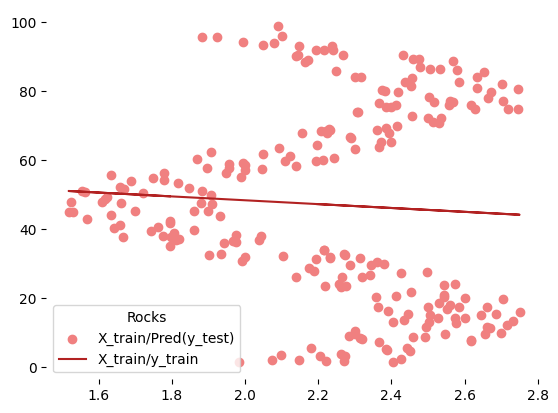

In [18]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')

plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Rocks', loc='best', facecolor='white')
plt.box(False)
plt.show()

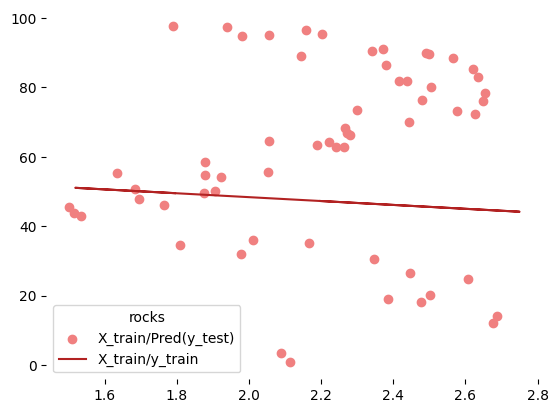

In [19]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'rocks', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [20]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [-5.59713614]
Intercept: 59.570451336354466


# KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

Text(0.5, 1.0, 'ELBOW PLOT')

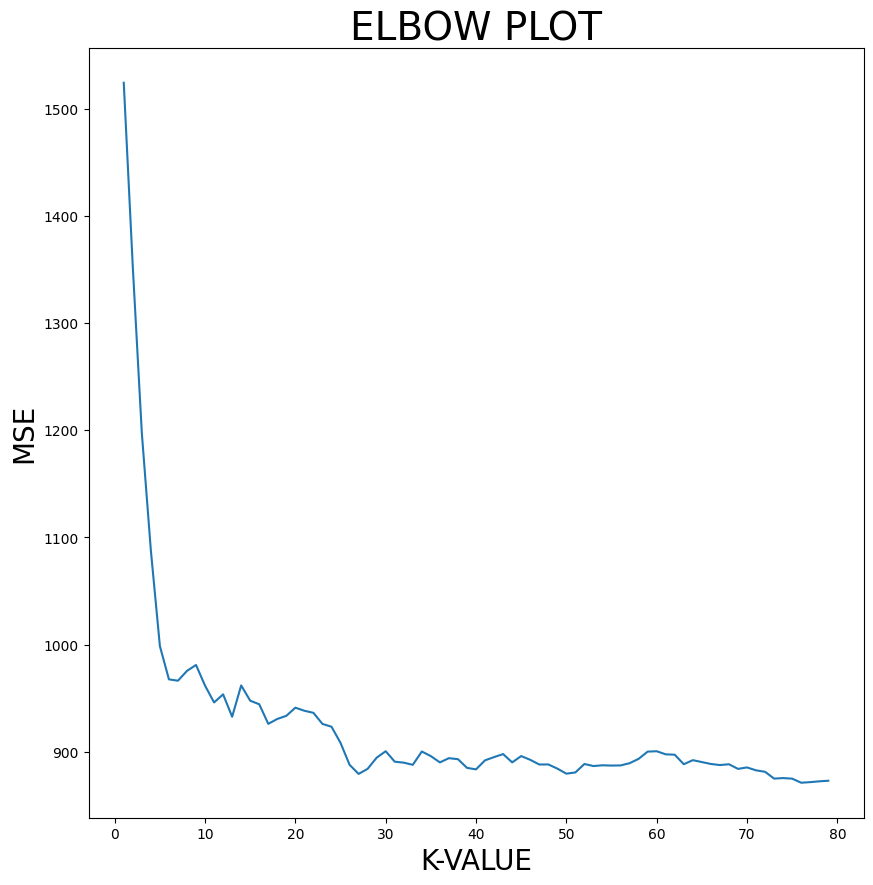

In [22]:
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
#Storing MSE
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

In [23]:
mean_squared_error(y_test,y_knn_pred)


872.8067234846889

# Decsion tree

In [24]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

In [25]:
model = DecisionTreeRegressor(random_state = 0)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred = model.predict(X_test)

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)



RMSE:  39.045


In [32]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file ='tree_structure.dot',
               feature_names =[''])

# Support Vector

In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [35]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose
train = train.sort_values('Rock Density kg/m3')
test = test.sort_values('Rock Density kg/m3')

X_train, X_test = train[['Rock Density kg/m3']], test[['Rock Density kg/m3']]
y_train, y_test = train['Rebound Signal Strength nHz'], test['Rebound Signal Strength nHz']


In [36]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.svm import SVR

svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)


SVR(kernel='poly')

Text(0, 0.5, 'Rebound Signal Strength nHz')

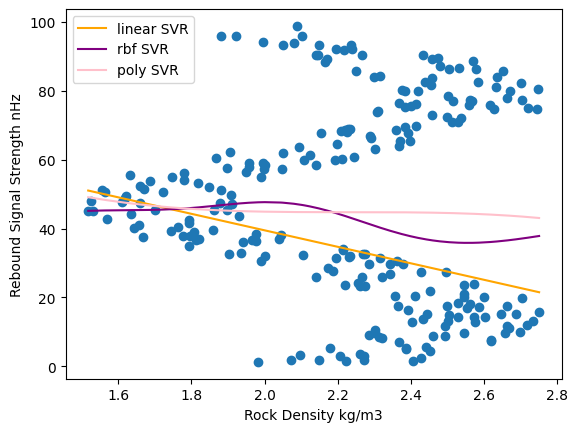

In [41]:
from matplotlib import pyplot as plt

#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['Rock Density kg/m3'], train['Rebound Signal Strength nHz'])
plt.plot(train['Rock Density kg/m3'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['Rock Density kg/m3'], train['rbf_svr_pred'], color = 'purple', label = 'rbf SVR')
plt.plot(train['Rock Density kg/m3'], train['poly_svr_pred'], color = 'pink', label = 'poly SVR')
plt.legend()
plt.xlabel('Rock Density kg/m3')
plt.ylabel('Rebound Signal Strength nHz')